# 

# Heart Disease Logistic Regression (Classification) Project Exercise 

**Creating a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


## Imports


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# 

### Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Confirming the target variable, has only 2 values

df['target'].unique()

array([1, 0], dtype=int64)

In [10]:
# Check if data has any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Visualization

**Bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

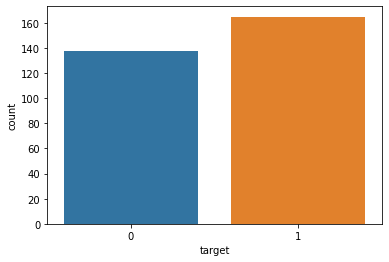

In [16]:
# Targets are almost evenly distributed. 
# This is good as it allows the model to generalise better and should lead to higher prediction accuracy.

sns.countplot(data = df,x = df['target'])

##

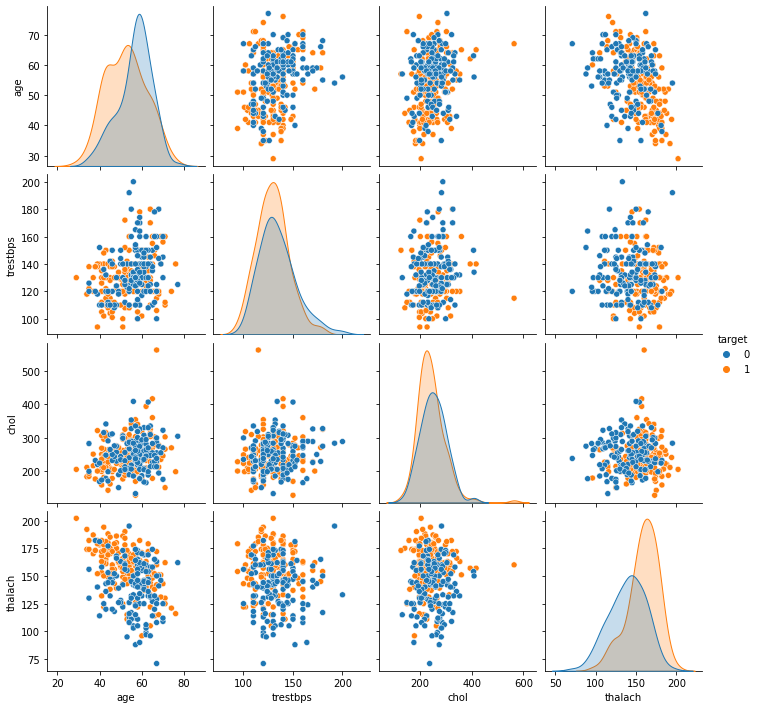

In [17]:
# Visualizing the data distribution through a pairplot

# Pairplot shows that though there is some distinction between the classes, it is far from the best

sns.pairplot(data= df,  vars= ['age','trestbps', 'chol','thalach'],hue='target' )

# 

<AxesSubplot:>

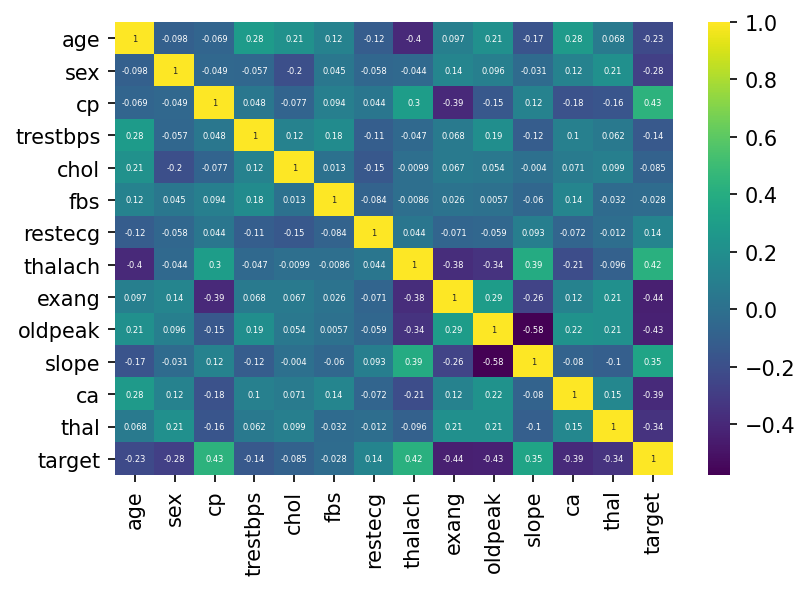

In [18]:
# Heatmap for Feature Set

#There is a fairly small set of features which seem to correlate.**

plt.figure(dpi= 150)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":4},cmap='viridis')

----
----

# Building our Logistic Model

## Train | Test Split and Scaling

In [19]:
## CREATE X and y
X = df.drop('target',axis=1)
y = df['target'] #scikit ok with the labels for y being strings #no need to change to int or onehot code

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# FIT & TRANSFORM TRAIN DATA; FIT ONLY X TEST DATA (TO PREVENT DATA LEAKAGE) 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 

## Logistic Regression Model

**Creating a Logistic Regression model and using Cross-Validation to find a well-performing C value for the hyper-parameter search.** 

Could have used *LogisticRegression* and *GridSearchCV*, but since *LogisticRegressionCV* is an option, would use that instead.

In [22]:
from sklearn.linear_model import LogisticRegressionCV

In [78]:
# LogCV will auto check a number of Cs, number based on values you pick

log_model = LogisticRegressionCV()

In [20]:
 #help(LogisticRegressionCV)

In [24]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [25]:
# C values Log model checked by default

log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [26]:
# C values Log model selected as optimal

log_model.C_

array([0.04641589])

In [28]:
# Dict of parameters it fitted on

log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [29]:
# Model Coefficients

log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [37]:
# Count of features in the dataset (minus target) = Count of features in model coefficients

len(df.columns.drop('target')) == len(log_model.coef_[0])

True

# 

**Visualize the coefficients in a barplot**

In [40]:
pd.Series(index=X.columns, data = log_model.coef_[0])

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

In [41]:
# Assign to a variable

coefs = pd.Series(index=X.columns,data = log_model.coef_[0])

In [43]:
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<AxesSubplot:>

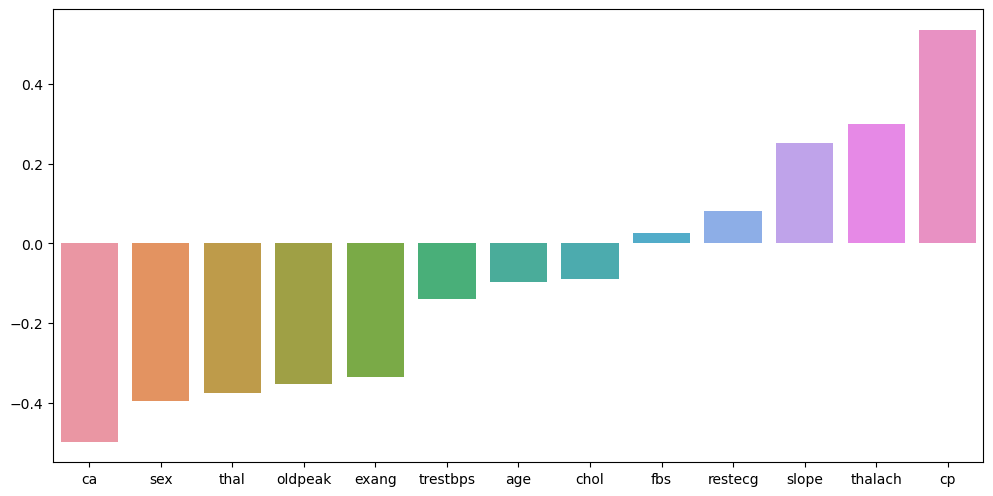

In [47]:
# Plot coefficients into a barplot, view strength of the features on the target Y variable

plt.figure(dpi=100,figsize=(12,6))

coefs = coefs.sort_values()
sns.barplot(x=coefs.index,y = coefs.values)

# 

---------

## Model Performance Evaluation

Eevaluating model on the remaining 10% of the data - the test set.**

**THrough the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [48]:
# Predict y variables from X test data

y_pred = log_model.predict(scaled_X_test)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
# Accuracy Score

accuracy_score(y_test,y_pred)

0.8387096774193549

In [51]:
# Confustion Matrix

confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [52]:
from sklearn.metrics import plot_confusion_matrix

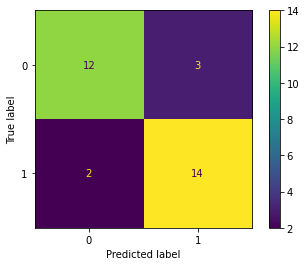

In [54]:
# Plot confusion matrix

# Model seems to be doing quite well in making predictions
# False positives and negatives are not too high

plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [56]:
# Calculating classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



**F1 score is similar to both precision and recall scores.**

**This indicates model is doing quite well overall.**

**It would be better for the model to catch the Positive cases that were labelled Negative**

# 

### Performance Curves

**Calculating both the precision recall curve and the ROC Curve.**

In [57]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)

0.8235294117647058

In [58]:
recall_score(y_test,y_pred)

0.875

In [59]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

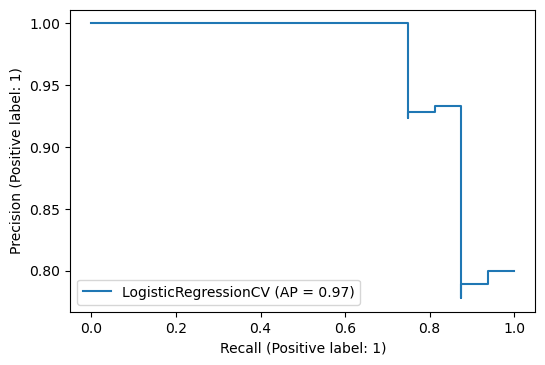

In [65]:
fig,ax = plt.subplots(dpi=100)
plot_precision_recall_curve(log_model,scaled_X_test,y_test,ax=ax)

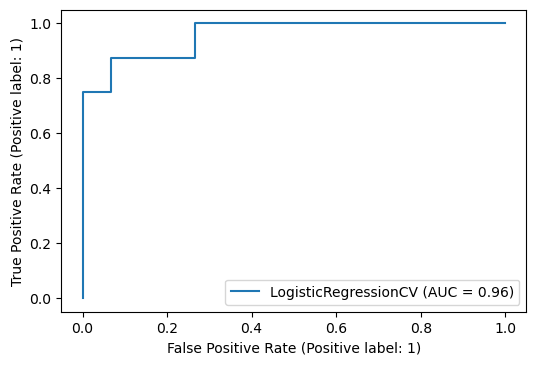

In [66]:
fig,ax = plt.subplots(dpi=100)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

# 

## Test Model 

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Predicting model outcome, and sureness of model's predicition**



In [67]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [69]:
# Model Predictions: Remember 0 - No heart disease, 1 - Heart Disease Present

log_model.predict(patient)

array([0], dtype=int64)

In [70]:
# Probability confidence of model's prediction

log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])

In [71]:
# Saving probability confidence to a variable

patient_pred = log_model.predict_proba(patient)

In [77]:
#Calculating probability confidence as a percentage

(patient_pred[0][0]/patient_pred[0].sum())*100

99.99998615440825

**The model predicts the patient does not have heart disease, and with a high 99.99% confidence**


## 